#   EE 521 DSP Lab 

##  Assignment-2 | AVI KHANDELWAL, 204102301 

## Function  Definitions -

In [111]:
from numpy import pi
import numpy as np
from numpy import pi,cos
import matplotlib.pyplot as plt
import math as m
from pandas.plotting import autocorrelation_plot
from skimage.util import random_noise
import warnings
import cv2 as cv 
from google.colab import files
from skimage import io
from PIL import Image 

warnings.filterwarnings('ignore')

def Beta(x,y):
    return (m.gamma(x)*m.gamma(y))/m.gamma(x+y)

def Mean(t,y):
    return round(np.sum(t*y)/100,2)

def Median(t,z):
    p = 0
    index = 0
    for i in range(len(t)):
        if round(z[i],2) == 0.50:
            index = i
            break
    return round(t[index],2)

def Variance(t,y):
    return round((np.sum(y*((t-Mean(t,y))**2))/100),2)

def Mode(t,y):
    i = np.argmax(y)
    return round(t[i],2)

def fact(n):
    if n==1 or n==0:
        return 1
    else:
        return n*fact(n-1)
    
def Comb(n,r):
    return int(fact(n)/(fact(r)*fact(n-r)))

def cross_correlation(x,y):
    y = np.flip(y)
    temp = len(x)
    x = np.concatenate([np.zeros(len(y)-1),x])
    y = np.concatenate([y,np.zeros(temp-1)])
    
    N = len(x) + len(y) - 1
    o = np.zeros((len(x),len(y)))
    O = np.zeros(len(x) + len(y)- 1)
    
    for i in range(len(x)):
        for j in range(len(y)):
            o[i][j] = x[i]*y[j]
    
    for index in range(N):
        for i in range(len(x)):
            for j in range(len(y)):
                if i + j == index:
                    O[index] += o[i][j]
                    
    neg = O[:np.argmax(O)]
    pos = O[np.argmax(O):]
    return neg,pos

# PART A: Continuous Distributions

## 1. PDF and CDF of Uniform (a,b)

Text(0.5, 1.0, 'pdf and cdf of continous uniform distribution')

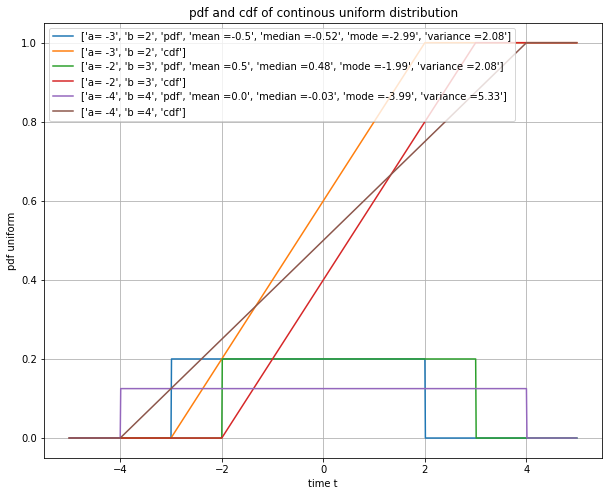

In [112]:
t = np.arange(-5,5,0.01)
a = [-3,-2,-4]
b = [2,3,4]
lst = []
plt.figure(figsize=(10,8))

for k in range(3):
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    for i in range(len(t)):
        if t[i] >= a[k] and t[i] <= b[k]:
            y[i] = 1/(b[k]-a[k])
            z[i] = z[i-1] + (1/(b[k]-a[k]))*0.01
        if t[i] >= b[k]:
            z[i] = 1
    lst.append(["a= "+str(a[k]),"b ="+str(b[k]),"pdf","mean ="+str(Mean(t,y)),"median ="+str(Median(t,z)),"mode ="+str(Mode(t,y)),"variance ="+str(Variance(t,y))])
    lst.append(["a= "+str(a[k]),"b ="+str(b[k]),"cdf"])
    plt.plot(t,y)
    plt.plot(t,z)
    plt.grid()
plt.legend(lst, loc ="upper left")
plt.xlabel("time t")
plt.ylabel("pdf uniform")
plt.title("pdf and cdf of continous uniform distribution")

## 2. PDF and CDF of Exponential (λ)

Text(0.5, 1.0, 'pdf and cdf of continous exponential distribution')

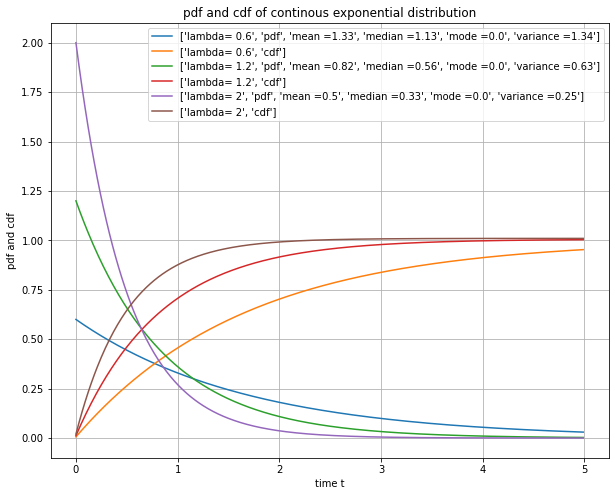

In [113]:
t = np.arange(0,5,0.01)
lst = []
lamda = [0.6,1.2,2]
plt.figure(figsize=(10,8))
for k in range(3):
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    for i in range(len(t)):
        y[i] = lamda[k]*np.exp(-lamda[k]*t[i])
        z[i] = z[i-1] + lamda[k]*np.exp(-lamda[k]*t[i])*0.01
    lst.append(["lambda= "+str(lamda[k]),"pdf","mean ="+str(Mean(t,y)),"median ="+str(Median(t,z)),"mode ="+str(Mode(t,y)),"variance ="+str(Variance(t,y))])
    lst.append(["lambda= "+str(lamda[k]),"cdf"])
    plt.plot(t,y)
    plt.plot(t,z)
    plt.grid()
plt.legend(lst, loc ="upper right")
plt.xlabel("time t")
plt.ylabel("pdf and cdf")
plt.title("pdf and cdf of continous exponential distribution")

## 3. PDF and CDF of Gamma (γ)

Text(0.5, 1.0, 'pdf and cdf of continous gamma distribution')

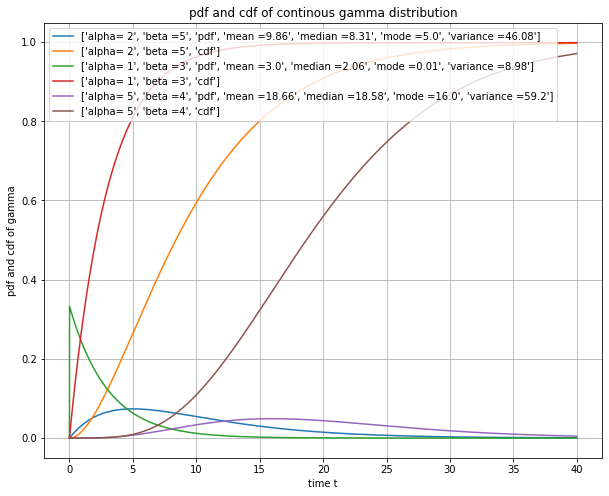

In [116]:
t = np.arange(0,40,0.01)
lst = []
alpha = [2,1,5]
beta = [5,3,4]
plt.figure(figsize=(10,8))
for k in range(3):
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    for i in range(1,len(t)):
        y[i] = (m.pow(beta[k],-alpha[k]) * m.pow(t[i],alpha[k]-1) * np.exp(-t[i]/beta[k]))/m.gamma(alpha[k])
        z[i] = z[i-1] + ((m.pow(beta[k],-alpha[k]) * m.pow(t[i],alpha[k]-1) * np.exp(-t[i]/beta[k]))/m.gamma(alpha[k]))*0.01
    lst.append(["alpha= "+str(alpha[k]),"beta ="+str(beta[k]),"pdf","mean ="+str(Mean(t,y)),"median ="+str(Median(t,z)),"mode ="+str(Mode(t,y)),"variance ="+str(Variance(t,y))])
    lst.append(["alpha= "+str(alpha[k]),"beta ="+str(beta[k]),"cdf"])
    plt.plot(t,y)
    plt.plot(t,z)
    plt.grid()
plt.legend(lst, loc ="upper left")
plt.xlabel("time t")
plt.ylabel("pdf and cdf of gamma")
plt.title("pdf and cdf of continous gamma distribution")

## 4. PDF and CDF of Beta (β)

Text(0.5, 1.0, 'pdf and cdf of continous beta distribution')

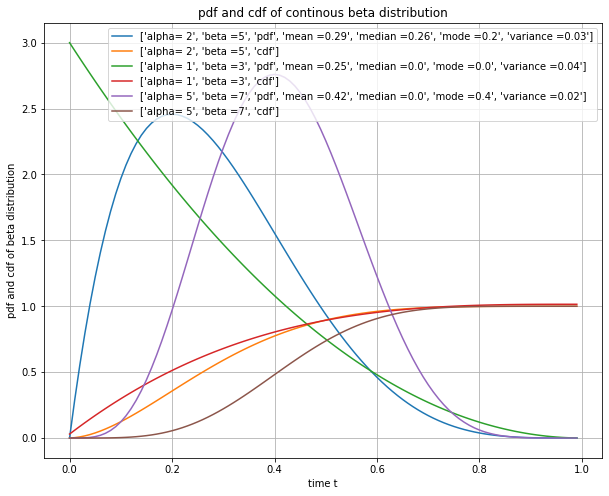

In [117]:
t = np.arange(0,1,0.01)
lst = []
alpha = [2,1,5]
beta = [5,3,7]
plt.figure(figsize=(10,8))
for k in range(3):
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    for i in range(len(t)):
        y[i] = (m.pow(t[i],alpha[k]-1) * m.pow(1-t[i],beta[k]-1)/Beta(alpha[k],beta[k]))
        z[i] = z[i-1] + (m.pow(t[i],alpha[k]-1) * m.pow(1-t[i],beta[k]-1)/Beta(alpha[k],beta[k]))*0.01
    lst.append(["alpha= "+str(alpha[k]),"beta ="+str(beta[k]),"pdf","mean ="+str(Mean(t,y)),"median ="+str(Median(t,z)),"mode ="+str(Mode(t,y)),"variance ="+str(Variance(t,y))])
    lst.append(["alpha= "+str(alpha[k]),"beta ="+str(beta[k]),"cdf"])
    plt.plot(t,y)
    plt.plot(t,z)
plt.grid()
plt.legend(lst, loc ="upper right")
plt.xlabel("time t")
plt.ylabel("pdf and cdf of beta distribution")
plt.title("pdf and cdf of continous beta distribution")

## 5. PDF and CDF of  Gaussian (µ,σ)

Text(0.5, 1.0, 'pdf and cdf of gaussian distribution')

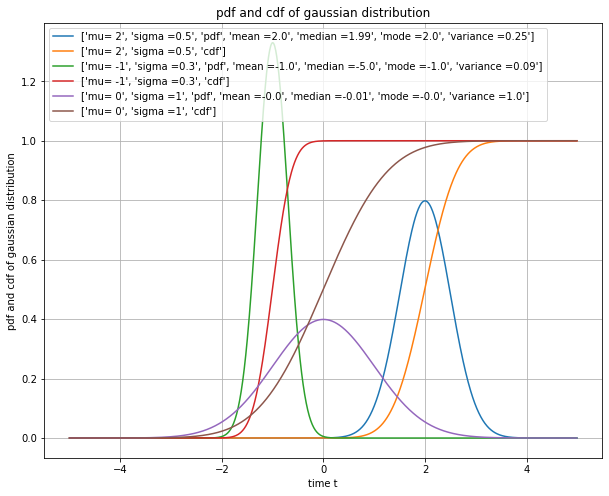

In [ ]:
t = np.arange(-5,5,0.01)
lst = []
mu = [2,-1,0]
sigma = [0.5,0.3,1]
plt.figure(figsize=(10,8))
for k in range(3):
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    for i in range(len(t)):
        y[i] = np.exp(-((t[i]-mu[k])**2)/(2*(sigma[k]**2)))/(sigma[k]*(2*np.pi)**(0.5))
        z[i] = z[i-1] + (np.exp(-((t[i]-mu[k])**2)/(2*(sigma[k]**2)))/(sigma[k]*(2*np.pi)**(0.5)))*0.01
    lst.append(["mu= "+str(mu[k]),"sigma ="+str(sigma[k]),"pdf","mean ="+str(Mean(t,y)),"median ="+str(Median(t,z)),"mode ="+str(Mode(t,y)),"variance ="+str(Variance(t,y))])
    lst.append(["mu= "+str(mu[k]),"sigma ="+str(sigma[k]),"cdf"])
    plt.plot(t,y)
    plt.plot(t,z)
    plt.grid()
plt.legend(lst, loc ="upper left")
plt.xlabel("time t")
plt.ylabel("pdf and cdf of gaussian distribution")
plt.title("pdf and cdf of gaussian distribution")

## 6. PDF and CDF of  Chi-squared (k)

Text(0.5, 1.0, 'pdf and cdf of Chi-squared distribution')

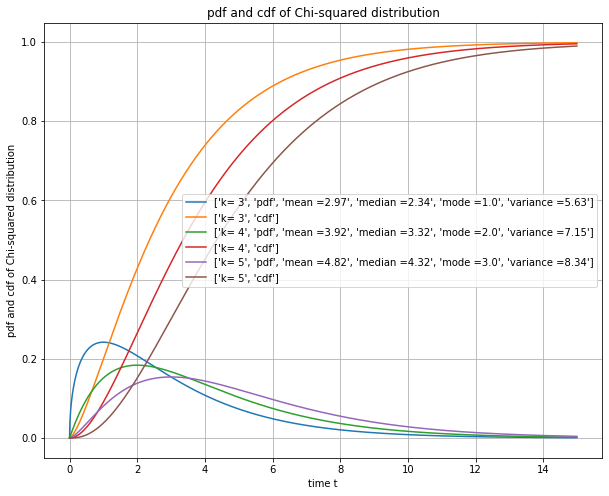

In [ ]:
t = np.arange(0,15,0.01)
lst = []
K = [3,4,5]
plt.figure(figsize=(10,8))
for k in range(3):
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    for i in range(1,len(t)):
        y[i] = (m.pow(t[i],(K[k]/2)-1)*np.exp(-t[i]/2))/(m.pow(2,K[k]/2)*m.gamma(K[k]/2))
        z[i] = z[i-1] + ((m.pow(t[i],(K[k]/2)-1)*np.exp(-t[i]/2))/(m.pow(2,K[k]/2)*m.gamma(K[k]/2)))*0.01
    plt.plot(t,y)
    plt.plot(t,z)
    lst.append(["k= "+str(K[k]),"pdf","mean ="+str(Mean(t,y)),"median ="+str(Median(t,z)),"mode ="+str(Mode(t,y)),"variance ="+str(Variance(t,y))])
    lst.append(["k= "+str(K[k]),"cdf"])
plt.grid()
plt.legend(lst, loc ="center right")
plt.xlabel("time t")
plt.ylabel("pdf and cdf of Chi-squared distribution")
plt.title("pdf and cdf of Chi-squared distribution")

Text(0.5, 1.0, 'pdf of power (Rayleigh distribution)')

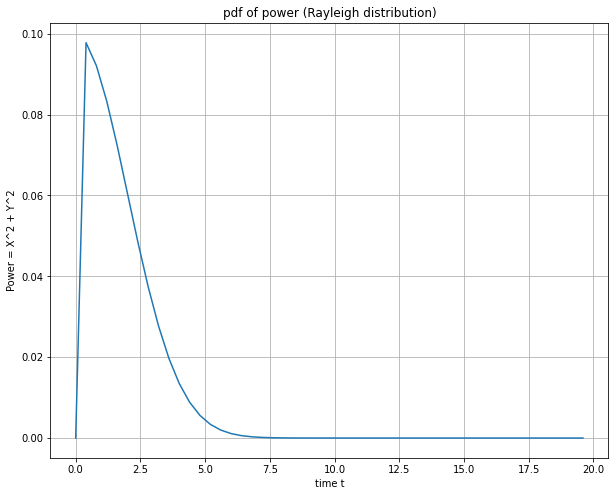

In [154]:
t = np.arange(0,20,0.4)
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
P = np.zeros(len(t))
lst = []
plt.figure(figsize=(10,8))

for i in range(1,len(t)):
    y[i] = np.exp(-((t[i])**2)/(2*(2**2)))/(4*(2*np.pi)**(0.5))
    x[i] = np.exp(-((t[i])**2)/(2*(2**2)))/(4*(2*np.pi)**(0.5))
    P[i] = x[i]**2 + y[i]**2
    z[i] = z[i-1] + P[i]*0.4
P = np.sqrt(x**2 + y**2)
plt.plot(t,x)
plt.grid()
plt.xlabel("time t")
plt.ylabel("Power = X^2 + Y^2")
plt.title("pdf of power (Rayleigh distribution)")

# PART B: Discrete Distributions

<StemContainer object of 3 artists>

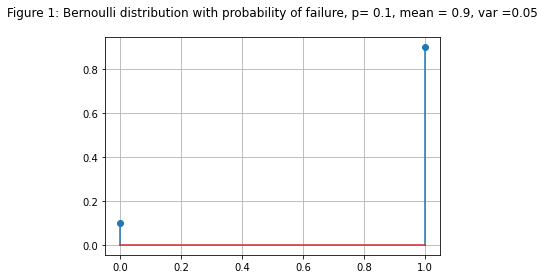

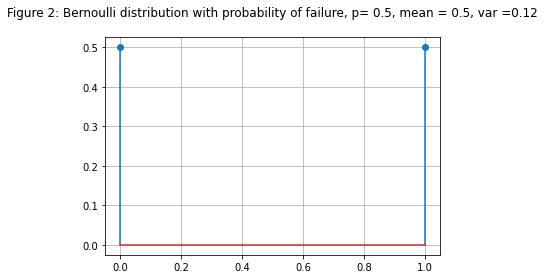

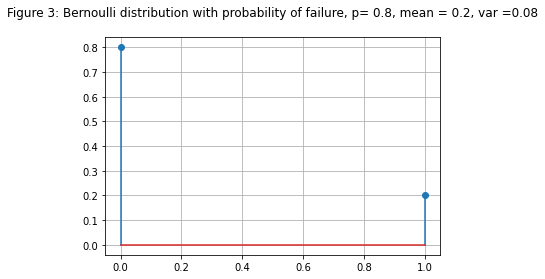

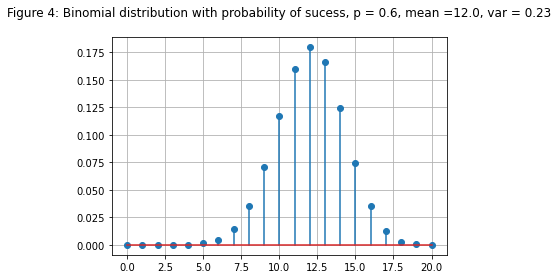

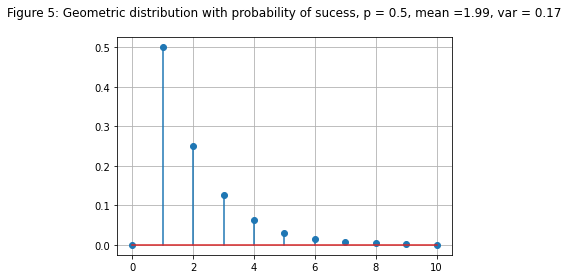

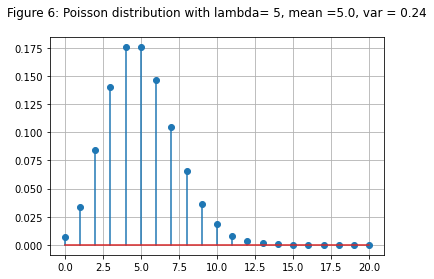

In [138]:
# Discrete distributions


# 1. X follows Bernoulli distribution

p = [0.1,0.5,0.8]
x = np.arange(0,2,1)
for i in range(3):
    plt.figure(i+1,figsize=(6,4))
    plt.grid("on")
    y = np.array([p[i],1-p[i]])
    mean = round(np.sum(x*y),2)
    var = round(np.sum(((x-mean)**2)*y)/(len(x)),2)
    plt.title("Figure "+str(i+1)+": Bernoulli distribution with probability of failure, p= "+str(p[i]) + ", mean = "+str(mean)+ ", var ="+str(var)+"\n")
    plt.stem(x,y)


# 2. X follows Binomial distribution  

plt.figure(4,figsize=(6,4))
p = 0.6 # 1-0.4
plt.grid("on")
x = np.arange(0,21)
P = np.zeros(21)
for r in range(21): 
    P[r] = Comb(20,r)*(0.6**r)*(0.4**(20-r))
mean = round(np.sum(x*P),2)
var = round(np.sum(((x-mean)**2)*P)/(len(x)),2)
plt.title("Figure 4: Binomial distribution with probability of sucess, p = "+str(p)+", mean ="+ str(mean)+", var = "+str(var)+"\n")
plt.stem(x,P)

# 3. X follows Geometric distribution  
plt.figure(5,figsize=(6,4))
p = 0.5
plt.grid("on")
x = np.arange(0,11)
P = np.zeros(11)
for r in range(1,11): 
    P[r] = p*((1-p)**(r-1))
plt.stem(x,P)
mean = round(np.sum(x*P),2)
var = round(np.sum(((x-mean)**2)*P)/(len(x)),2)
plt.title("Figure 5: Geometric distribution with probability of sucess, p = "+str(p)+", mean ="+ str(mean)+", var = "+str(var)+"\n")

# 3. X follows Poisson distribution  
plt.figure(6,figsize=(6,4))
lamda = 5
plt.grid("on")

x = np.arange(0,21)
P = np.zeros(21)
for r in range(0,21): 
    P[r] = (np.exp(-lamda)*(lamda**r))/fact(r)
mean = round(np.sum(x*P),2)
var = round(np.sum(((x-mean)**2)*P)/(len(x)),2)
plt.title("Figure 6: Poisson distribution with lambda= "+ str(lamda)+", mean ="+ str(mean)+", var = "+str(var)+"\n")
plt.stem(x,P)

### Q2a. Plot the following sequences

#### x1[n] = [1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1]
#### x2[n] = [1, 2, 1, 2, 1, 2, 1, 2]
#### x3[n] = [1, 2, 3, 2, 4, 6, 4, 8, 12]
#### x4[n] = [2, 4, 2, 4, 2, 4, 2, 4]
#### x5[n] = [1, −2, 3, −2, 1, −2, 3, −4, 3, −2, 1]
#### x6[n] = 2 × x1[n] + 1.

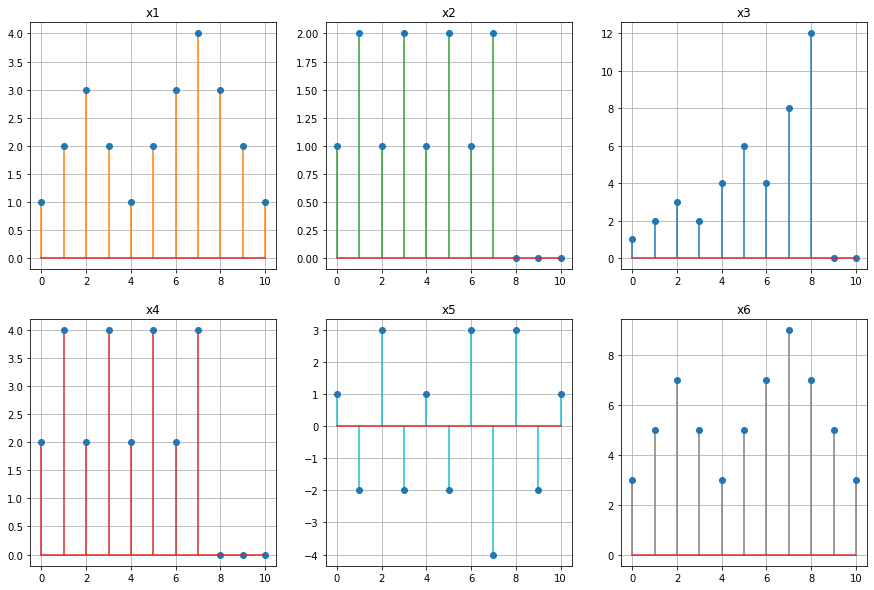

In [ ]:
x = np.zeros((6,11),int)


x[0] = np.array([1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1])
x[1] = np.array([1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0])
x[2] = np.array([1, 2, 3, 2, 4, 6, 4, 8, 12, 0, 0])
x[3] = np.array([2, 4, 2, 4, 2, 4, 2, 4, 0, 0, 0])
x[4] = np.array([1,-2, 3,-2, 1,-2, 3, -4, 3,-2, 1])
x[5] = 2*x[0] + 1

t = np.arange(11)
color = ['tab:orange','tab:green','tab:blue','tab:red','tab:cyan','tab:grey']
fig, axs = plt.subplots(2, 3,figsize=(15,10))

for i in range(6):
    axs[i//3, i%3].stem(t,x[i],color[i])
    axs[i//3, i%3].set_title("x%d"%(i+1))
    axs[i//3, i%3].grid("on")

### Q2b. Plot the autocorrelation function and find the power of all the sequences.

Autocorrelation value for delay of 2 samples for x1 = 45
Power of the sequence x1 = 62

Autocorrelation value for delay of 2 samples for x2 = 15
Power of the sequence x2 = 20

Autocorrelation value for delay of 2 samples for x3 = 143
Power of the sequence x3 = 294

Autocorrelation value for delay of 2 samples for x4 = 60
Power of the sequence x4 = 80

Autocorrelation value for delay of 2 samples for x5 = 45
Power of the sequence x5 = 62

Autocorrelation value for delay of 2 samples for x6 = 273
Power of the sequence x6 = 355



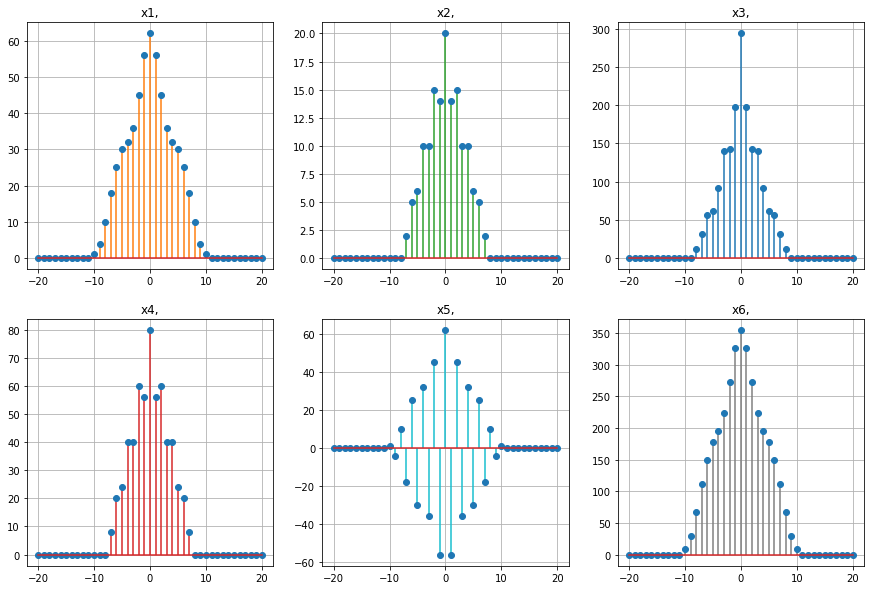

In [ ]:
t = np.arange(-20,21)
fig, axs = plt.subplots(2, 3,figsize=(15,10))

for i in range(6):
    ac_neg,ac_pos = cross_correlation(x[i],x[i])
    auto_corr = np.concatenate([ac_neg,ac_pos])
    axs[i//3, i%3].stem(t,auto_corr,color[i])
    axs[i//3, i%3].set_title("x%d,"%(i+1))
    axs[i//3, i%3].grid("on")
    print("Autocorrelation value for delay of 2 samples for x%d = %d"% ((i+1),ac_pos[2]))
    print("Power of the sequence x%d = %d\n"% ((i+1),ac_pos[0]))
    

### Q2c. Also find the cross correlation function for all the pairs for a delay of 2 samples. To compute the autocorrelation function write a python function from scratch.

Cross-correlation value for delay of 2 samples between x1 and x2 = 26
Cross-correlation value for delay of 2 samples between x1 and x3 = 90
Cross-correlation value for delay of 2 samples between x1 and x4 = 52
Cross-correlation value for delay of 2 samples between x1 and x5 = 1
Cross-correlation value for delay of 2 samples between x1 and x6 = 111
Cross-correlation value for delay of 2 samples between x2 and x3 = 34
Cross-correlation value for delay of 2 samples between x2 and x4 = 30
Cross-correlation value for delay of 2 samples between x2 and x5 = 10
Cross-correlation value for delay of 2 samples between x2 and x6 = 68
Cross-correlation value for delay of 2 samples between x3 and x4 = 112
Cross-correlation value for delay of 2 samples between x3 and x5 = 12
Cross-correlation value for delay of 2 samples between x3 and x6 = 213
Cross-correlation value for delay of 2 samples between x4 and x5 = 20
Cross-correlation value for delay of 2 samples between x4 and x6 = 136
Cross-correlation

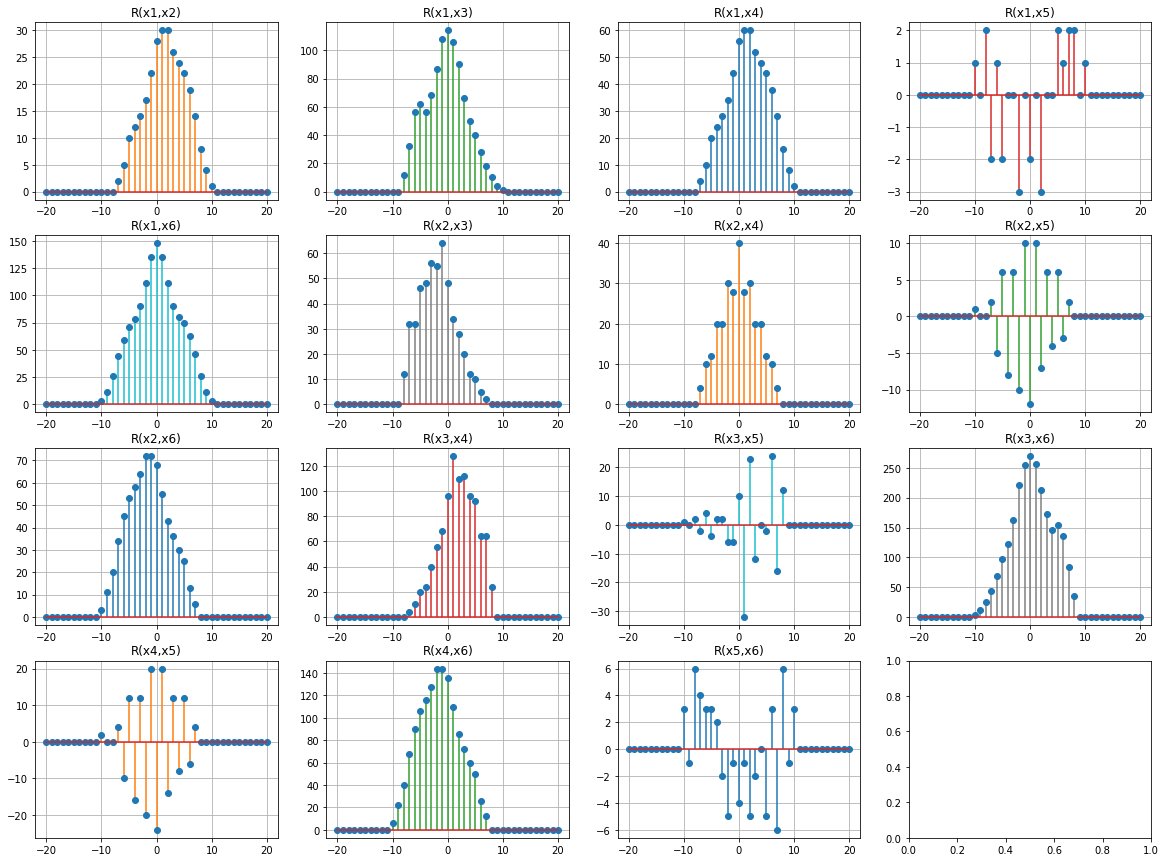

In [ ]:
t = np.arange(-20,21)
fig, axs = plt.subplots(4, 4,figsize=(20,15))
num = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3),(3,0),(3,1),(3,2)]
index = 0

for i in range(6):
    for j in range(i+1,6):
        ac_neg,ac_pos = cross_correlation(x[i],x[j])
        auto_corr = np.concatenate([ac_neg,ac_pos])
        axs[num[index]].stem(t,auto_corr,color[index%6])
        axs[num[index]].set_title("R(x%d,x%d)"%((i+1),(j+1)))
        axs[num[index]].grid("on")
        print("Cross-correlation value for delay of 2 samples between x%d and x%d = %d"% ((i+1),(j+1),ac_pos[2]))
        index += 1
        

### Q2d. Compare the timing of your code and the inbuilt function using timeit for all the pairs and observe which is faster, your approach or the library’s inbuilt method.

In [ ]:
from timeit import default_timer as timer

start = timer()
for i in range(6):
    for j in range(i+1,6):
        cross_correlation(x[i],x[j])
end = timer()
code = round(end-start,6)

print("The inbuilt library method takes = "+str(lib)+" sec")
print("My code takes = "+str(code)+" sec")
print("Comparing the timing of my code and the inbuilt function using timeit for all the pairs, library's inbuilt method is faster.")

The inbuilt library method takes = 0.000495 sec
My code takes = 0.053484 sec
Comparing the timing of my code and the inbuilt function using timeit for all the pairs, library's inbuilt method is faster.


### Q3a. Generate an uncorrelated uniform random noise sequence, an uncorrelated white noise sequence, and a red noise sequence. Why are they called so? What are their distributions?

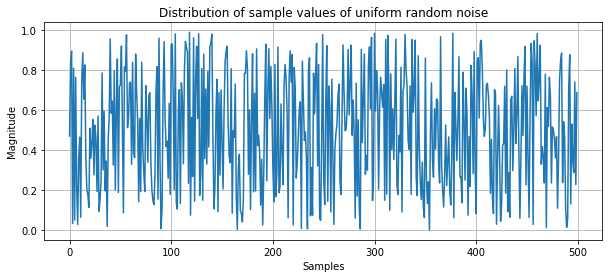

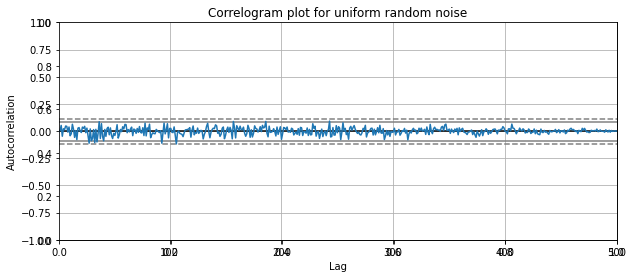

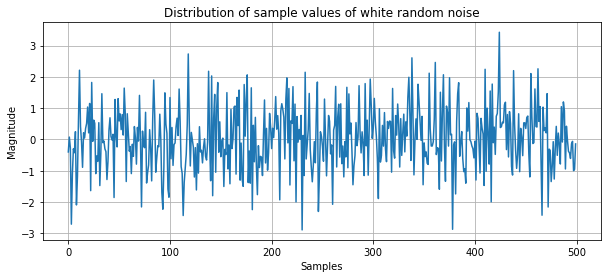

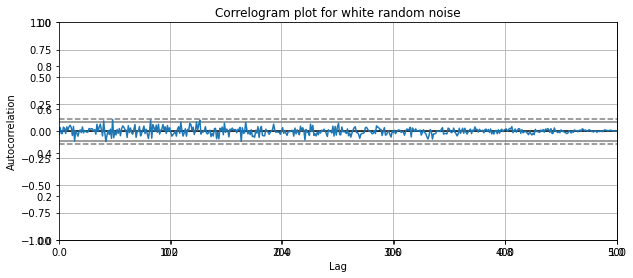

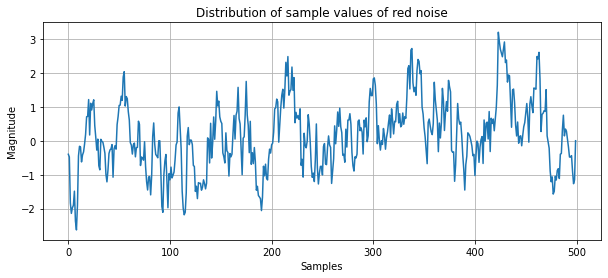

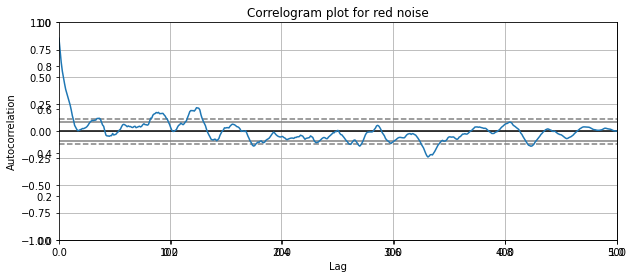

In [ ]:
mean = 0
std = 1 
num_samples = 500

samples_white = np.random.normal(mean, std, size=num_samples)

samples_uniform = np.random.uniform(0, 1, size=num_samples)

samples_red = np.zeros(num_samples)
samples_red[0] = samples_white[0]
r = 0.85
for i in range(1,num_samples-1):
    samples_red[i]  = r*samples_red[i-1]  + ((1 - r**2)**0.5)*samples_white[i+1]

noise = [samples_uniform,samples_white,samples_red]
labels = ["uniform random noise","white random noise","red noise"]
j = 0

for i in range(3):
    j += 1
    plt.figure(j,figsize=(10,4))
    plt.title("Distribution of sample values of %s"%(str(labels[i])))
    plt.xlabel("Samples")
    plt.ylabel("Magnitude")
    plt.grid("on")
    plt.plot(noise[i])
    j += 1
    plt.figure(j,figsize=(10,4))
    plt.title("Correlogram plot for %s"%(str(labels[i])))
    autocorrelation_plot(noise[i])
    plt.show()

### From the above correlogram plots we can conclude that -

#### 1. Autocorrelation values of uniform random noise are very small hence it is of uncorrelated type.
#### 2. Autocorrelation values of white random noise are very small hence it is of uncorrelated type.
#### 3. Whearas in case of red noise, there is a spike in correlogram plot indicating high degree of correlation hence it is of correlated type

### Q3b. Generate a random sinusoid x[n] = A cos(ω0n + φ) where A is uniformly distributed random variable in [0,4] and φ is uniformly distributed random variable in [0, 2π].

### Q3c. Generate a noisy sinusoid with amplitude 5 and frequence ω = 2π. Use the gaussian noise of mean 0 and variance 1 to be used as an envelope

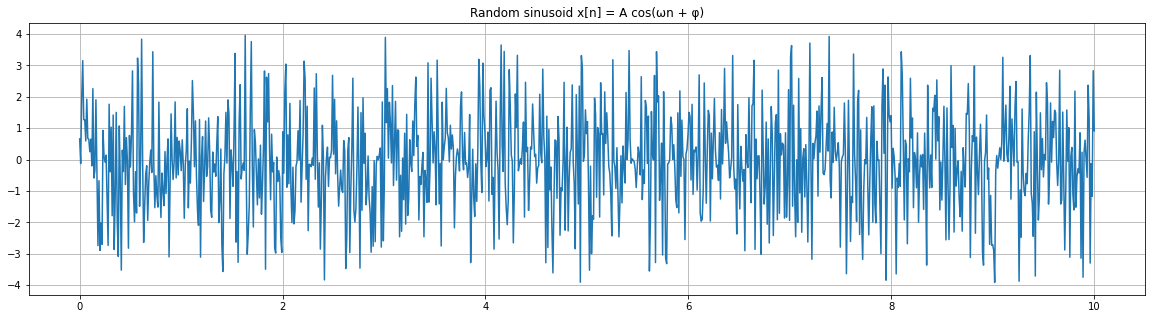

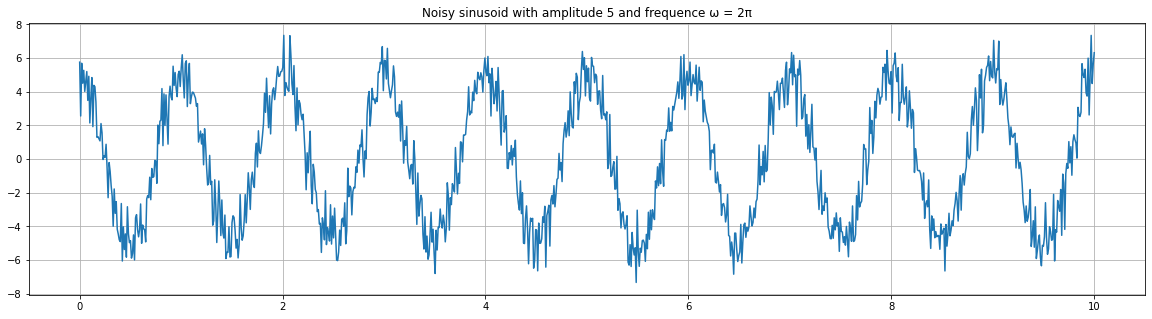

In [ ]:
A = np.random.uniform(0, 4, size=1000)
phi = np.random.uniform(0, 2*pi, size=1000)
omega = 2*pi
t = np.linspace(0,10,1000)
plt.figure(1,figsize=(20,5))
x = A*cos(omega*t + phi)
plt.title("Random sinusoid x[n] = A cos(ωn + φ)")
plt.grid()
plt.plot(t,x)

y = 5*np.cos(2*pi*t) + np.random.normal(0, 1, size=1000)
plt.figure(2,figsize=(20,5))
plt.title("Noisy sinusoid with amplitude 5 and frequence ω = 2π")
plt.grid()
plt.plot(t,y)

#  Try visualizing the effects of noise addition to images, use the speckle, salt and pepper, gaussian noises in images.

([], <a list of 0 Text major ticklabel objects>)

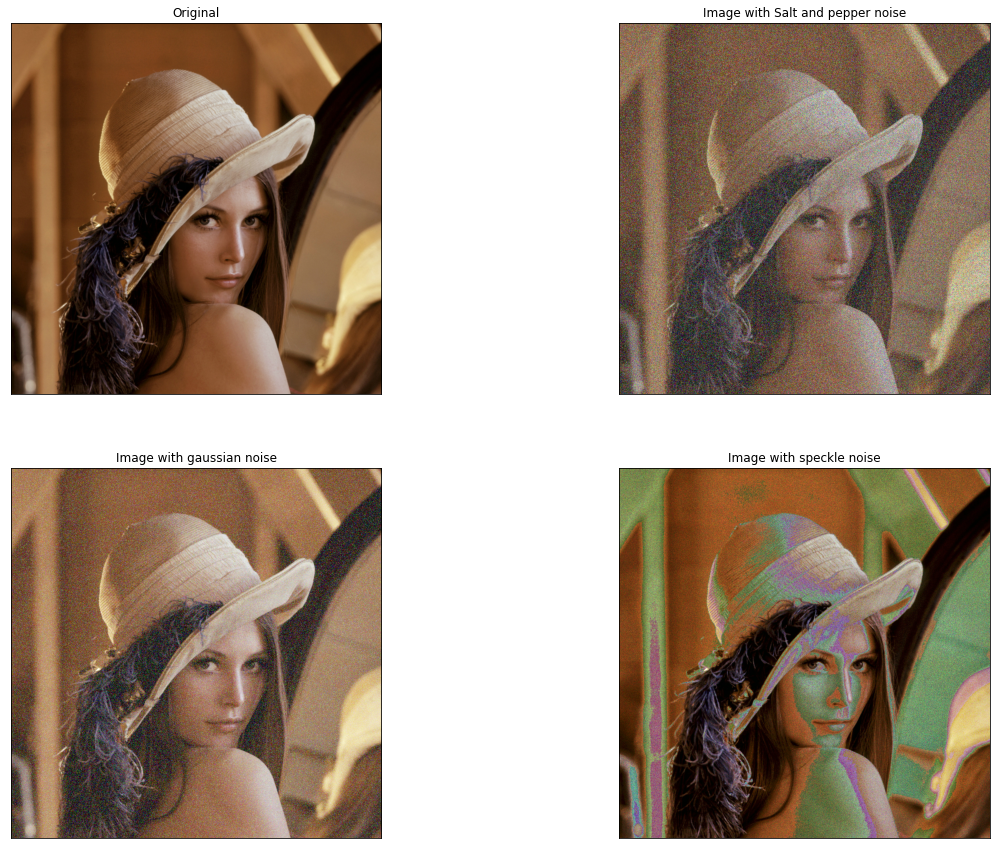

In [152]:
img = cv2.imread("lenna.jpg")
img1 = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,15))

plt.subplot(221)
plt.title('Original')
plt.imshow(img1)
plt.xticks([])
plt.yticks([])

# Salt and pepper noise
noise_img = random_noise(img1, mode='s&p',amount=0.4) 
noise_img = np.array(255*noise_img, dtype = 'uint8')
plt.subplot(222)
plt.title('Image with Salt and pepper noise')
plt.imshow(noise_img)
plt.xticks([])
plt.yticks([])

# gaussain noise
gauss = np.random.normal(0,1,img1.size)
gauss = gauss.reshape(img1.shape[0],img1.shape[1],img1.shape[2]).astype('uint8')
img_gauss = cv2.add(img1,gauss)
plt.subplot(223)
plt.title('Image with gaussian noise')
plt.imshow(img_gauss )
plt.xticks([])
plt.yticks([])

# speckle noise
uniform = np.random.uniform(0, 1.5,img1.size)
uniform = uniform.reshape(img1.shape[0],img1.shape[1],img1.shape[2]).astype('uint8')
noise = img1 + img1 * uniform
plt.subplot(224)
plt.title('Image with speckle noise')
plt.imshow(noise)
plt.xticks([])
plt.yticks([])